# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 12 </span>
## <span style="color:orange"> Keras - Deep & Convolutional Neural Network image recognition </span>

### Esercizio 12.1
L'obiettivo di questo esercizio è di studiare come variano le performance del modello DNN fornito 
in base al numero di epoche $N_{\mathrm{epochs}}$ e  del
tipo di ottimizzatori.


In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [2]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


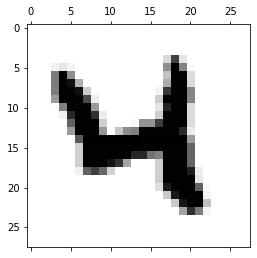

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [3]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [5]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model(opt):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


Epoch 1/15
1875/1875 [==============================] - 9s 5ms/step - loss: 1.2532 - acc: 0.6367 - val_loss: 0.6019 - val_acc: 0.8740
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6818 - acc: 0.8091 - val_loss: 0.4288 - val_acc: 0.8972
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5579 - acc: 0.8450 - val_loss: 0.3665 - val_acc: 0.9080
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4963 - acc: 0.8600 - val_loss: 0.3319 - val_acc: 0.9130
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4609 - acc: 0.8706 - val_loss: 0.3101 - val_acc: 0.9187
Epoch 6/15
1875/1875 [==============================] - 8s 5ms/step - loss: 0.4296 - acc: 0.8795 - val_loss: 0.2923 - val_acc: 0.9220
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4088 - acc: 0.8843 - val_loss: 0.2789 - val_acc: 0.9252
Epoch 8/15
1875/1875 [==============================] - 9s 5

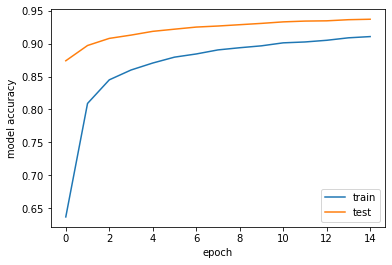

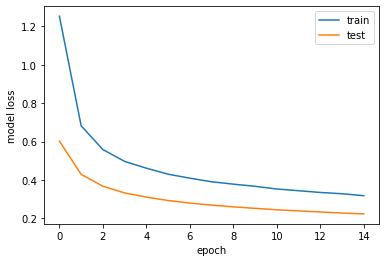

In [6]:
# training parameters
batch_size = 32
epochs = 15
opt=Adagrad()

model_DNN = compile_model(opt)# create the deep neural net
history = model_DNN.fit(X_train, Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, Y_test))
score = model_DNN.evaluate(X_test, Y_test, verbose=0)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [7]:
def model_create(opt):
    model_DNN = compile_model(opt)# create the deep neural net
    history = model_DNN.fit(X_train, Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, Y_test))
    score = model_DNN.evaluate(X_test, Y_test, verbose=0)
    print()
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('model accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()

# summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('model loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()

Si pone $N_{\mathrm{epochs}}=50$ come nel modello fornito.

In [ ]:
batch_size = 32
epochs = 50
optim='Adagrad'
model_create_adagrad=model_create(optim)
    

Epoch 1/50
1437/1875 [=====================>........] - ETA: 1s - loss: 1.4709 - acc: 0.5568- ETA: 2s - loss:  - ETA: 2s - loss: 1.4837 - acc: 0. - ETA: 1s - loss: 1.4673 - acc: 0.5578

Si pone $N_{\mathrm{epochs}}=70$ e utlizzo come ottimizzatore Adagrad.

In [ ]:
batch_size = 32
epochs = 70
optim='Adagrad'
model_create_adagrad=model_create(optim)

Quindi si cambia ottimizzatore e si sceglie adadelta, sempre per $N_{\mathrm{epochs}}=50$.

In [ ]:
batch_size = 32
epochs = 50
optim='adadelta'
model_create_adagrad=model_create(optim)

Si cambia ancora  ottimizzatore e si sceglie adam,  sempre per $N_{\mathrm{epochs}}=50$.

In [ ]:
batch_size = 32
epochs = 50
optim='Adam'
model_create_adagrad=model_create(optim)

Si cambia ancora  ottimizzatore e si sceglie adamax,  sempre per $N_{\mathrm{epochs}}=50$.

In [ ]:
batch_size = 32
epochs = 50
optim='Adamax'
model_create_adagrad=model_create(optim)

Si cambia ancora  ottimizzatore e si sceglie RMSprop,  sempre per $N_{\mathrm{epochs}}=50$.

In [ ]:
batch_size = 32
epochs = 50
optim='RMSprop'
model_create_adagrad=model_create(optim)

Dai risultati ottenuti si evince che, a parità di $N_{\mathrm{epochs}}$, l'ottimizzatore Adamax è quello
che restituisce i risultati più accurati. A partità di modello invece accuratezza migliora all'aumentare del 
numero di $N_{\mathrm{epochs}}$. 

In [ ]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

In [ ]:
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [ ]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

## Esercizio 12.2
L'obiettivo di questo esercizio è di cambiare l'architettura del DNN dell'esercizio precedente aggiungendo in esso
i layers `Conv2D`, `MaxPooling2D`, `Dropout`.


In [58]:

from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


Vengono aggiunti i convolutional layers nel DNN.

In [59]:
def create_CNN():
    # instantiate model
    model = Sequential()
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(5,kernel_size=(5,5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())         
    model.add(Dense(400, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    model.summary()
    return model

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 8, 8, 5)           1255      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 4, 4, 5)           0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 4, 4, 5)           0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 80)                0         
_________________________________________________________________
dense_72 (Dense)             (None, 400)             

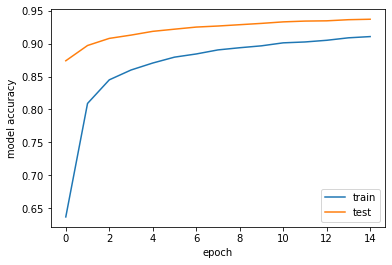

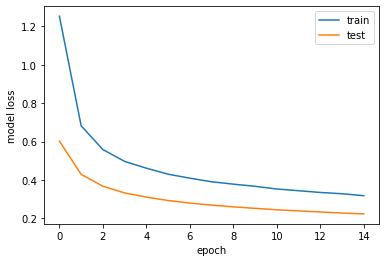

In [61]:
batch_size = 32
epochs =30

# create the deep conv net
model_CNN=create_CNN()

# train CNN
model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

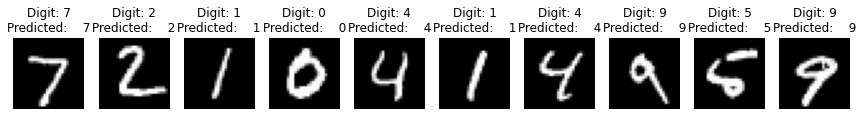

In [62]:
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

### Esercizio 12.3
L'obiettivo di questo esercizio è di verificare se il CNN dell'esercizio precedente riesce a leggere dei numeri scritti a mano.
Per fare questo si creano  10 immagini (una per ogni numero da 0 a 9) con l'applicazione gimp e si testa il CNN con queste immagini.

Image size: 28x28
Image size: 28x28
Image size: 28x28
Image size: 28x28
Image size: 28x28
Image size: 28x28
Image size: 28x28
Image size: 28x28
Image size: 28x28
Image size: 28x28


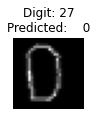

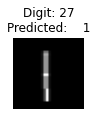

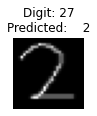

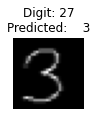

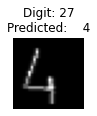

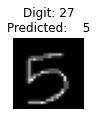

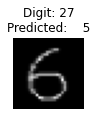

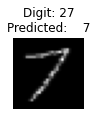

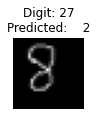

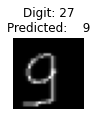

In [63]:
from PIL import Image
import os
n=10
for l in range (10):
    digit_filename = 'im' + str(l)+ '.png'
    digit_in = Image.open(digit_filename).convert('L')
#digit_in = Image.open("8b.png").convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE

    ydim, xdim = digit_in.size
    print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    data = data.reshape(1,xdim*ydim)
    if keras.backend.image_data_format() == 'channels_first':
        data  = data.reshape(data.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        data = data.reshape(data.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)
       
    pred_0 = model_CNN.predict(data)
   
    data = data.reshape(xdim,ydim)
    plt.figure(figsize=(15, 15))    
    ax = plt.subplot(2, 10, l + 1)       
    plt.imshow(data, cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(i, np.argmax(pred_0)))    
    plt.axis('off') 
plt.show()
    


In [ ]:
Il CNN riconosce 8 numeri su 10. Questo risultato conferma il fatto che il CNN implementato funziona correttamente.